In [67]:
#函式庫
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd #Read data
import numpy as np 

from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

In [68]:
#資料前處理==========================================================================================================================================

In [69]:
all_feature_name= ['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標',
                '手機電池電量','手機外殼/包膜指標','外型平均曲率','上網頻率指標',
                '通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']

important_featuree=['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']

In [70]:
#建立相關函式
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 使用微软雅黑
plt.rcParams['axes.unicode_minus'] = False
#(1)顯示資料方式:---------------------------------------------------------------------------------------------------------------
#pandas格式=變數.head()

#(2)資料分析--------------------------------------------------------------------------------------------------------------------
#1.pandas內建平均算數method=變數.describe()
#2.箱型圖----box_graph(data_train,name_list_outlier)
def box_graph(data_frame,name_list):
    for i in range(len(name_list)):
        plt.figure(figsize=(2,5))
        plt.boxplot(data_frame[name_list[i]],showmeans=True)   
        plt.title(name_list[i])
        plt.show()
        sns.histplot(data_frame[name_list[i]], kde=True)
        plt.show()
        print("偏態(Skewness): {:.2f}".format(data_frame[name_list[i]].skew()))
        print("峰度(Kurtosis): {:.2f}".format(data_frame[name_list[i]].kurt()))
        print('==================================================================================================')
        
#3.關係圖----corr_matrix_graph(data_train)
def corr_matrix_graph(data_frame):
    corr_matrix = data_frame.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt='.2f') #各參數代表的意思請查閱seaborn.heatmap官網的說明
    plt.title(' Correlation ')
    plt.show()

#4 顯示陣列箱形圖-----
#feature_matrix_numpy(x_data, feature_ex)、feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率'] 
#feature_target_relationship_dataframe(data_train, feature_ex, 'Underclocking')  
def feature_matrix_numpy(data, feature_ex):
    data_df = pd.DataFrame(data, columns=feature_ex)

    # 绘制每个特征的直方图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)  # 根据特征数量调整网格大小
        sns.histplot(data_df[feature], kde=True)
        plt.title(f'分布情况：{feature}')
    plt.tight_layout()
    plt.show()

    # 绘制所有特征的箱线图
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=data_df)  # 正确使用 data_df
    plt.xticks(rotation=45)
    plt.title('所有特征的箱线图')
    plt.show()

def feature_target_relationship_dataframe(data, feature_ex, target_feature):

    # 每个特征与目标特征的散点图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)  # 根据特征数量调整网格大小
        sns.scatterplot(x=data[feature], y=data[target_feature])
        plt.title(f'{feature} 与 {target_feature} 的关系')
    plt.tight_layout()
    plt.show()

    # 每个特征与目标特征的箱线图
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(feature_ex):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(x=data[target_feature], y=data[feature])
        plt.title(f'{feature} 根据 {target_feature} 的箱线图')
    plt.tight_layout()
    plt.show()

#5.shap研究中
#6.pca

#(3)資料處理---------------------------------------------------------------------------------------------------------------------------
#1.離群值處理
#data_train=outlier_del(data_train,name_list_outlier,n1=5,n2=5)
#name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)', '手機背蓋溫度(平均)','平均APP運作指標/小時', '充電時間指標', '手機電池電量', '上網頻率指標', '通話頻率指標', '內容容量比率']
#name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']

def  outlier_del(data_frame,name_list_outlier,n1=5,n2=5):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1

        # 定义离群值范围
        lower_bound = Q1 - n1 * IQR
        upper_bound = Q3 + n2 * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

#2.正規化&標準化----切記data要用成numpy
#x_data = data_train[feature_ex].to_numpy()
#y_data = data_train['Underclocking'].to_numpy()
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized
    
def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 




In [71]:
#(4)資料分割
def data_split(x_data,y_data):
    trainX, testX, trainY, testY = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
    return trainX, testX, trainY, testY 

In [72]:
#main:
#step1--讀取資料
data_train = pd.read_excel("01train.xlsx")

#step2--data處理
name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)', '手機背蓋溫度(平均)','平均APP運作指標/小時', '充電時間指標', '手機電池電量', '上網頻率指標', '通話頻率指標', '內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']
data_train=outlier_del(data_train,name_list_outlier,n1=5,n2=5)

feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
x_data_xg = data_train[feature_ex].to_numpy()
y_data_xg = data_train['Underclocking'].to_numpy()

x_data_xg=data_normalized(x_data_xg)
x_dat_xg=data_standardized(x_data_xg)

#step3---data分割
trainX_xg, testX_xg, trainY_xg, testY_xg =data_split(x_data_xg,y_data)


手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3902,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3902,)
Shape Of The After Ouliers:  (3876,)
充電時間指標
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3876,)
手機電池電量
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3876,)
上網頻率指標
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3876,)
通話頻率指標
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3876,)
內容容量比率
Shape Of The Before Ouliers:  (3876,)
Shape Of The After Ouliers:  (3874,)


In [73]:
#所有模型===============================================================================================================================
#xgboost
#(1)模型本體
def xgboostModel_fun(n=10000, lr=0.01, maxdepth=3, g=10):
    xgboostModel = XGBClassifier(n_estimators=n, 
                                 learning_rate=lr,
                                 max_depth=maxdepth,
                                 gamma=g)
    return xgboostModel

xgboostModel = XGBClassifier(n_estimators=10000, 
                             learning_rate=  0.3,
                             max_depth=5,
                             gamma=4.499999999999998)
# 使用訓練資料訓練模型
xgboostModel.fit(trainX_xg, trainY_xg)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(testX_xg)
print('訓練集: ',xgboostModel.score(trainX_xg,trainY_xg))
print('測試集: ',xgboostModel.score(testX_xg,testY_xg))

訓練集:  0.772782503037667
測試集:  0.7233676975945017


In [ ]:
# 读取测试数据
data_test = pd.read_excel("01test.xlsx")
test_id = data_test.pop('id')  
data_test=data_test[feature_ex]
# 假设 data_normalized 和 data_standardized 已正确定义
data_test = data_normalized(data_test)
data_test = data_standardized(data_test)

# 使用xgboost模型进行预测
predicted_ans = xgboostModel.predict(data_test)  # 确保这里使用的是正确处理后的测试数据

# 创建提交DataFrame
my_submission = pd.DataFrame({'id': test_id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)

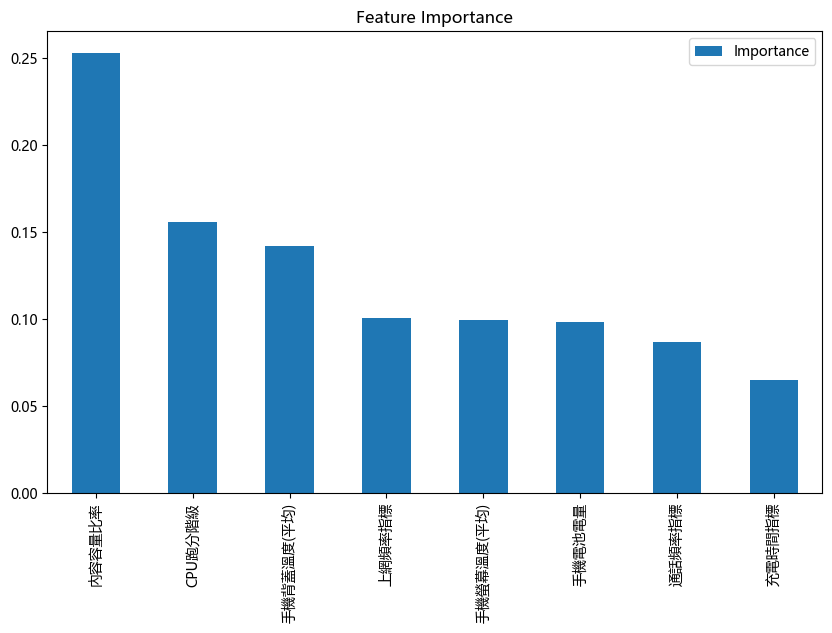

In [74]:
#模型內建分析特徵
importances = xgboostModel.feature_importances_
features = feature_ex
importance_df = pd.DataFrame(importances, index=features, columns=['Importance']).sort_values('Importance', ascending=False)
importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

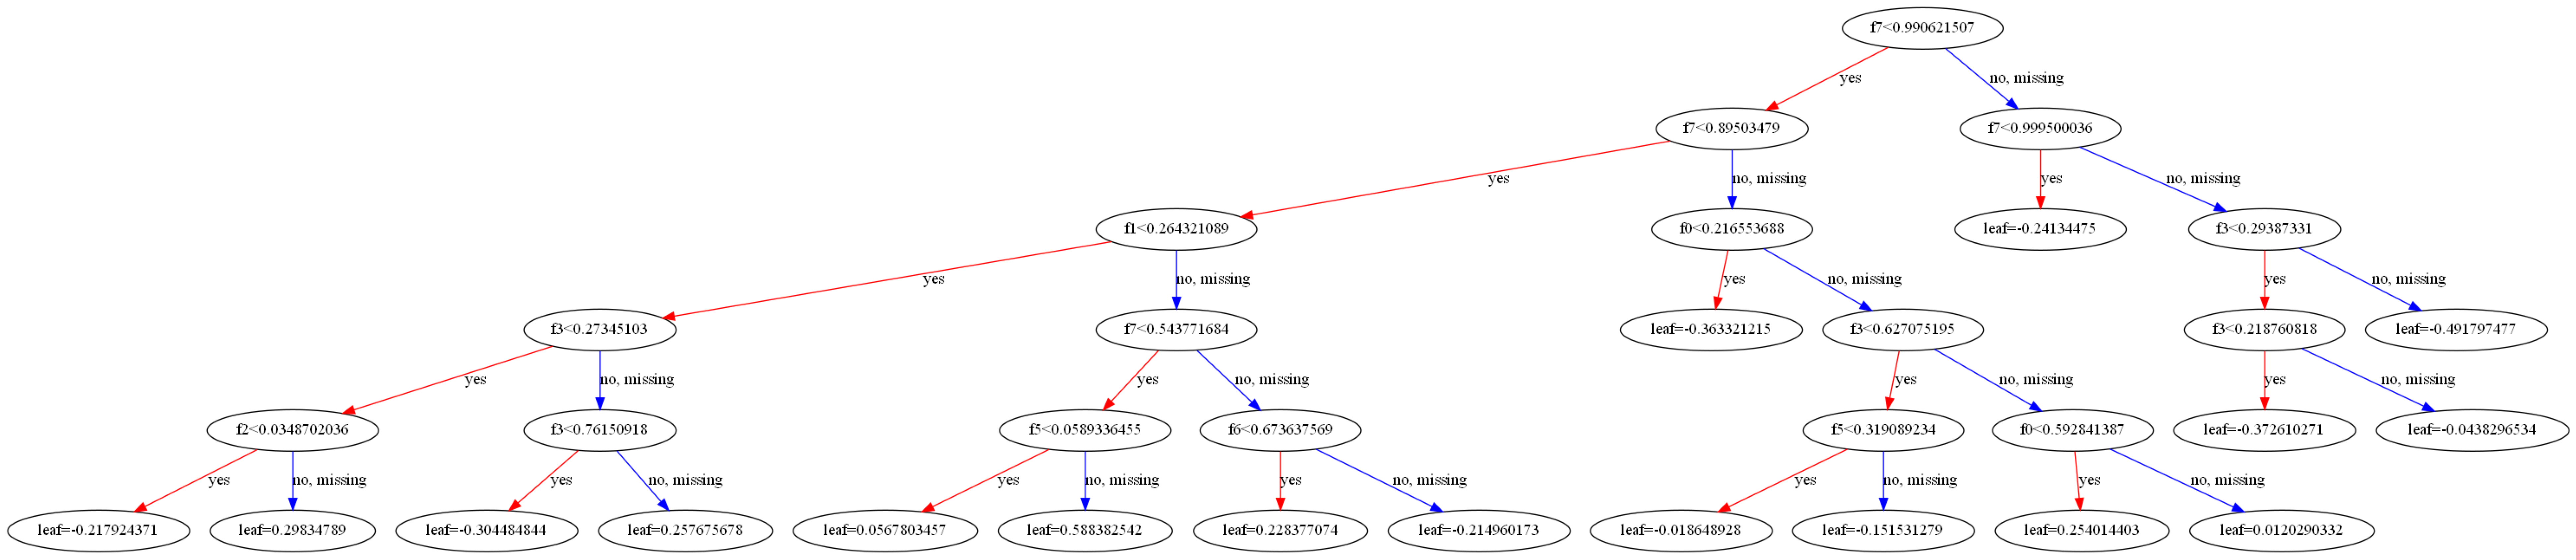

In [75]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(100, 100))
plot_tree(xgboostModel, ax=ax)
plt.savefig('xgboost_tree.png')
plt.show()

In [76]:
#CATBOOST
data_train_cat = data_train.copy()
for feature in all_feature_name:
    data_train_cat[feature] = data_train[feature].astype(str)

y_data_cat = data_train_cat['Underclocking']
feature_ex =['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
x_data_cat = data_train_cat[feature_ex]

trainX_cat, testX_cat, trainY_cat, testY_cat =data_split(x_data_cat,y_data)

cat_features = list(range(x_data_cat.shape[1]))
print(cat_features)

from catboost import Pool
train_data = Pool(data=trainX_cat,
                  label=trainY_cat,
                  cat_features=cat_features
                 )
valid_data = Pool(data=testX_cat,
                  label=testY_cat,
                  cat_features=cat_features
                 )


[0, 1, 2, 3, 4, 5, 6, 7]


In [77]:
#(2)模型本體
from catboost import CatBoostClassifier
SEED = 1

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'early_stopping_rounds': 200,
          'task_type': 'GPU',
          'verbose': 10,
         
         }
cbc = CatBoostClassifier(**params)
cbc.fit(train_data, # instead of X_train, y_train
          eval_set=valid_data, # instead of (X_valid, y_valid)
          use_best_model=True, 
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.064349
0:	test: 0.6255805	best: 0.6255805 (0)	total: 27.9ms	remaining: 27.9s


Default metric period is 5 because AUC is/are not implemented for GPU


10:	test: 0.6865387	best: 0.6865387 (10)	total: 314ms	remaining: 28.2s
20:	test: 0.6913192	best: 0.6913192 (20)	total: 628ms	remaining: 29.3s
30:	test: 0.6890447	best: 0.6927563 (22)	total: 924ms	remaining: 28.9s
40:	test: 0.6928632	best: 0.6944487 (37)	total: 1.25s	remaining: 29.3s
50:	test: 0.6941399	best: 0.6944903 (48)	total: 1.53s	remaining: 28.5s
60:	test: 0.6946566	best: 0.6946566 (59)	total: 1.85s	remaining: 28.6s
70:	test: 0.6945378	best: 0.6946566 (59)	total: 2.16s	remaining: 28.2s
80:	test: 0.6941459	best: 0.6948347 (78)	total: 2.41s	remaining: 27.4s
90:	test: 0.6937836	best: 0.6948347 (78)	total: 2.68s	remaining: 26.7s
100:	test: 0.6930829	best: 0.6948347 (78)	total: 2.91s	remaining: 25.9s
110:	test: 0.6932313	best: 0.6948347 (78)	total: 3.13s	remaining: 25.1s
120:	test: 0.6935283	best: 0.6948347 (78)	total: 3.34s	remaining: 24.3s
130:	test: 0.6935877	best: 0.6948347 (78)	total: 3.59s	remaining: 23.8s
140:	test: 0.6934927	best: 0.6948347 (78)	total: 3.81s	remaining: 23.2s
1

In [78]:
#(3)CATBOOST--CV
from catboost import cv
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': SEED
         }

all_train_data = Pool(data=x_data_cat,
                      label=y_data_cat,
                      cat_features=cat_features
                     )

scores = cv(pool=all_train_data,
            params=params, 
            fold_count=4,
            seed=SEED, 
            shuffle=True,
            stratified=True, # if True the folds are made by preserving the percentage of samples for each class
            plot=True
           )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/4]
0:	test: 0.6520400	best: 0.6520400 (0)	total: 33.7ms	remaining: 33.6s
200:	test: 0.6854483	best: 0.6877195 (98)	total: 6.97s	remaining: 27.7s
400:	test: 0.6846745	best: 0.6877195 (98)	total: 14.1s	remaining: 21.1s
600:	test: 0.6819925	best: 0.6877195 (98)	total: 22.5s	remaining: 15s
800:	test: 0.6791930	best: 0.6877195 (98)	total: 30.9s	remaining: 7.68s
999:	test: 0.6778890	best: 0.6877195 (98)	total: 38.2s	remaining: 0us

bestTest = 0.6877195194
bestIteration = 98

Training on fold [1/4]
0:	test: 0.6643048	best: 0.6643048 (0)	total: 27.2ms	remaining: 27.2s
200:	test: 0.7207452	best: 0.7271417 (107)	total: 7.73s	remaining: 30.7s
400:	test: 0.7134946	best: 0.7271417 (107)	total: 14.8s	remaining: 22.1s
600:	test: 0.7124861	best: 0.7271417 (107)	total: 22.6s	remaining: 15s
800:	test: 0.7081696	best: 0.7271417 (107)	total: 30.7s	remaining: 7.63s
999:	test: 0.7052485	best: 0.7271417 (107)	total: 38.7s	remaining: 0us

bestTest = 0.7271417269
bestIteration = 107

Traini

In [79]:
#(4)CATBOOST--重點特徵計算
cbc.get_feature_importance(prettified=True)

,Feature Id,Importances
0,內容容量比率,48.571747
1,通話頻率指標,15.892744
2,CPU跑分階級,14.272269
3,手機電池電量,6.185184
4,手機螢幕溫度(平均),4.282330
5,充電時間指標,3.950731
6,手機背蓋溫度(平均),3.507688
7,上網頻率指標,3.337307


In [ ]:
#驗證模型與最佳化
#GridSearchCV
from sklearn.model_selection import GridSearchCV


def xgboost_model_tuning(trainX, trainY):
    # 定义模型
    model = XGBClassifier(n_estimators=10000)

    # 设置参数网格
    param_grid = {
        'gamma': np.arange(4, 5, 0.01),  # 探索 gamma 值从 0 到 0.1，步长为 0.01
        'learning_rate': np.arange(0.3, 0.4, 0.01),
        'max_depth': np.arange(0, 6, 1)              # 同时探索不同的学习率
    }

    # 创建 GridSearchCV 对象
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                               scoring='accuracy', verbose=1, n_jobs=-1)

    # 运行网格搜索
    grid_search.fit(trainX, trainY)

    # 打印最佳参数和最佳模型的得分
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

    return grid_search

#grid_search_result = xgboost_model_tuning(trainX, trainY)



In [ ]:
#summisssion
data_test = pd.read_excel("01test.xlsx")

for feature in feature_ex:
    data_test[feature] = data_test[feature].astype(str)
    
test_id = data_test.pop('id')  
data_test=data_test[feature_ex]
# 使用xgboost模型进行预测
predicted_ans = cbc_4.predict(data_test)  # 确保这里使用的是正确处理后的测试数据

# 创建提交DataFrame
my_submission = pd.DataFrame({'id': test_id, 'Underclocking': predicted_ans})
my_submission.to_csv('submission.csv', index=False)